The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


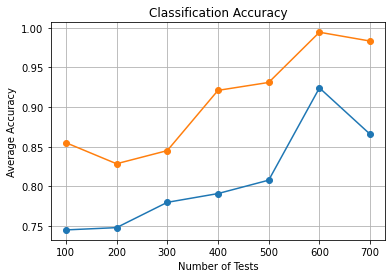

In [39]:
from MyDecoder import * #_cvxpy
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload

test_setSize = np.arange(100,800,100)

predictAcc = np.zeros(test_setSize.shape[0])
counter = 0

N = 1000
q = 0.2
p = 0.6
m = 200

for i_test in test_setSize:
    [X,ppl, y] = generator(N, q, i_test)
    pred_s = lp(X,y)
    predictAcc[counter] = 1-sum(abs((ppl-pred_s.T).T))/1000
    counter += 1
    
predictAcc_nonoverlapping = np.zeros(test_setSize.shape[0])
counter = 0

for i_test in test_setSize:
    [X,ppl, y, A] = generator_nonoverlapping(N, q, p, m, i_test)
    pred_s = lp_nonoverlapping(X,y,A)
    predictAcc_nonoverlapping[counter] = 1-sum(abs((ppl-pred_s.T).T))/1000
    counter += 1
    
plt.figure()
plt.plot(test_setSize,predictAcc,'o-',test_setSize,predictAcc_nonoverlapping,'o-')
plt.title("Classification Accuracy")
plt.xlabel("Number of Tests")
plt.ylabel("Average Accuracy")
plt.grid(True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


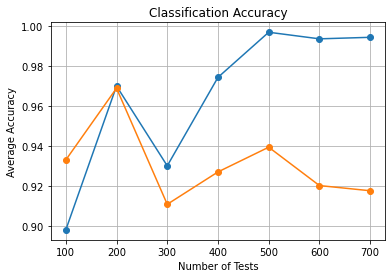

In [42]:
from MyDecoder import * #_cvxpy
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload
test_setSize = np.arange(100,800,100)

predictAcc = np.zeros(test_setSize.shape[0])
predictAcc_noise = np.zeros(test_setSize.shape[0])
counter = 0

for i_test in test_setSize:
    [X,ppl, y, A] = generator_nonoverlapping(1000, 0.1, 0.8, 200, i_test)
    
    pred_s = lp(X,y)
    predictAcc[counter] = 1-sum(abs((ppl-pred_s.T).T))/1000
    
    y = add_noise_zchannel(y, 0.1)
    
    pred_s = lp_noisy_z(X,y)
    predictAcc_noise[counter] = 1-sum(abs((ppl-pred_s.T).T))/1000
    
    counter += 1
    
    
plt.figure()
plt.plot(test_setSize,predictAcc,'o-',test_setSize,predictAcc_noise,'o-')
plt.title("Classification Accuracy")
plt.xlabel("Number of Tests")
plt.ylabel("Average Accuracy")
plt.grid(True)

In [26]:
print((pred_s))

None


In [ ]:
result = svm.TestCorrupted(p, X_test)
num_test = y_test.shape[0]
acc = 0
for i in np.arange(num_test):
    if result[i] == y_test[i]:
        acc += 1
print("Accuracy with corrupted test data: %.2f %%" % (acc/num_test * 100))

In [ ]:
from MyClassifier_3_JdA import * #_cvxpy
import matplotlib.pyplot as plt

selected_classes = np.array([1,7])
#selected_classes = np.arange(10)

X_train_all = np.genfromtxt(fname='mnist_train.csv', dtype=np.uint8, delimiter=',',skip_header = 1)
X_test_all = np.genfromtxt(fname='mnist_test.csv', dtype=np.uint8, delimiter=',',skip_header = 1)



In [ ]:
K_bin = np.meshgrid(np.arange(10), np.arange(10))
iu2 = np.triu_indices(10, 1)
K_bin = np.vstack((K_bin[1][iu2],K_bin[0][iu2])) 

# Initialize loss and gradient
for i_bin in np.arange(K_bin.shape[1]): 

    X_train = X_train_all[np.where(np.any(np.vstack([X_train_all[:,0] == x for x in K_bin[:,i_bin]]),axis=0))]
    y_train = X_train[:,0].astype(np.uint8)
    X_train = X_train[:,1:]

    X_test = X_test_all[np.where(np.any(np.vstack([X_test_all[:,0] == x for x in K_bin[:,i_bin]]),axis=0))]
    y_test = X_test[:,0].astype(np.uint8)
    X_test = X_test[:,1:]

    p = 0.
    svm = MyClassifier()
    svm.train(p, X_train, y_train)
    
    result = svm.classify(X_test)
    num_test = y_test.shape[0]
    acc = 0
    for i in np.arange(num_test):
        if result[i] == y_test[i]:
            acc += 1
            
    print(K_bin[:,i_bin])
    print((acc/num_test * 100))
    del svm,X_train, y_train, X_test ,y_test ,num_test
    

In [ ]:
from MyClassifier_3_JdA_cvxpy import * #_cvxpy
import matplotlib.pyplot as plt

selected_classes = np.array([1,7])
#selected_classes = np.arange(10)

X_train_all = np.genfromtxt(fname='mnist_train.csv', dtype=np.uint8, delimiter=',',skip_header = 1)
X_test_all = np.genfromtxt(fname='mnist_test.csv', dtype=np.uint8, delimiter=',',skip_header = 1)



K_bin = np.meshgrid(np.arange(10), np.arange(10))
iu2 = np.triu_indices(10, 1)
K_bin = np.vstack((K_bin[1][iu2],K_bin[0][iu2])) 

# Initialize loss and gradient
for i_bin in np.arange(K_bin.shape[1]): 

    X_train = X_train_all[np.where(np.any(np.vstack([X_train_all[:,0] == x for x in K_bin[:,i_bin]]),axis=0))]
    y_train = X_train[:,0].astype(np.uint8)
    X_train = X_train[:,1:]

    X_test = X_test_all[np.where(np.any(np.vstack([X_test_all[:,0] == x for x in K_bin[:,i_bin]]),axis=0))]
    y_test = X_test[:,0].astype(np.uint8)
    X_test = X_test[:,1:]

    p = 0.
    svm = MyClassifier()
    svm.train(p, X_train, y_train)
    
    result = svm.classify(X_test)
    num_test = y_test.shape[0]
    acc = 0
    for i in np.arange(num_test):
        if result[i] == y_test[i]:
            acc += 1
            
    print(K_bin[:,i_bin])
    print((acc/num_test * 100))
    del svm,X_train, y_train, X_test ,y_test ,num_test
    

In [ ]:
# Test Parameters

from MyClassifier_3 import * #_cvxpy

prob = [0.5] #[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,1.0]
nums = 5



accuracies = []
cor_accuracies = []
num_erased = []
max_acc_sum = 0

for p in prob:
    print("Training with p = %.2f:" % p)
    accs = []
    cor_accs = []
    erased = 0
    for n in range(nums):
        # Train Classifier
        np.random.seed(n)
        svm = MyClassifier()
        svm.train(p, X_train.copy(), y_train.copy())
          
        # Test Classifier
        result = svm.classify(X_test)
        num_test = y_test.shape[0]
        acc = 0
        for i in np.arange(num_test):
            if result[i] == y_test[i]:
                acc += 1
        #print("Accuracy: %.2f %%" % (acc/num_test * 100))
        accs.append(acc/num_test)
    
        # Test Corrupted Data
        result = svm.TestCorrupted(p, X_test)
        num_test = y_test.shape[0]
        acc = 0
        for i in np.arange(num_test):
             if result[i] == y_test[i]:
                acc += 1
        #print("Accuracy with corrupted test data: %.2f %%" % (acc/num_test * 100))
        cor_accs.append(acc/num_test)

        
        # Save Weights and Bias of the Best Classifier
        if accs[-1] > max_acc_sum:
            weights, bias = svm.getWeightsBias()
            max_acc_sum = accs[-1]
            #print("Current Best")
            
        print("Training with p = %.2f:" % accs[-1])
        
        del svm 
        
    accuracies.append(accs)
    cor_accuracies.append(cor_accs)

print(accuracies)
print(cor_accuracies)


In [ ]:
# Average Accuracy Plot
import matplotlib.pyplot as plt

ave_acc = []
ave_cor_acc = []
for acc in accuracies:
    ave_acc.append(sum(acc) / len(acc))
for acc in cor_accuracies:
    ave_cor_acc.append(sum(acc) / len(acc))
a = [i*100 for i in ave_acc]
ac = [i*100 for i in ave_cor_acc]
print(a)
print(ac)

plt.figure()
plt.plot(prob, a, "-o", prob, ac, "-o")
plt.legend(["Original Data", "Corrupted Data"])
plt.title("Classification Accuracy")
plt.xlabel("Erasure Probabilities")
plt.ylabel("Average Accuracy")
plt.grid(True)

In [ ]:
del svm

In [ ]:
import csv

# Save Best Weights and Bias
print(weights.shape)
with open('weights_3.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(weights)

print(bias.shape)
with open('bias_3.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(bias)

In [ ]:
#del svm


svm = MyClassifier()
svm.W = weights
svm.w = bias
result = svm.classify(X_test)
num_test = y_test.shape[0]
acc = 0
for i in np.arange(num_test):
    if result[i] == y_test[i]:
        acc += 1
            
print((acc/num_test * 100))

In [ ]:
svm = MyClassifier()
svm.W = weights.flatten()
svm.w = bias.flatten()
svm.f(np.dot(weights,X_test.T) + bias)

In [ ]:
np.shape(svm.W.flatten() )

In [ ]:
with open('bias_x.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(svm.W)